# Decision Tree Models:

In this section we will cover three topics, the three applications of decision trees:

1. Tree classifiers (predicting discrete values)
2. Tree regression (predicting continuous values)
3. Tree ensembles (combining models for better prediction)



## Basic Concept: 

A decision tree is a method at arriving at a decision using simple boolean logic: _If this, then that._ If you can picture a flow chart, then you can picture a decision tree. Let's take a look at the simplistic example of predicting sex based on height and weight of 10 individuals:

In [38]:
from sklearn import tree
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [39]:
mpl.rcParams['figure.figsize'] = (5,5)
viz_dict = {
    'axes.titlesize':18,
    'axes.labelsize':16,
}
sns.set_context("notebook", rc=viz_dict)

In [41]:
variables = {
    'height': [72, 72, 60, 68, 65, 65, 68, 66, 74, 71],
    'weight': [180, 150, 105, 165, 155, 124, 155, 137, 155, 170],
    'sex'   : ['M', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M']
}

df = pd.DataFrame(variables)
df.head()

,height,weight,sex
0,72,180,M
1,72,150,F
2,60,105,F
3,68,165,M
4,65,155,M


In [34]:
# seperate indendent and dependent variables
X = df.loc[:, ['height', 'weight']]
y = df.loc[:, 'sex']

# initialize and fit model:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

# get predictions:
prediction = clf.predict([[72, 189],
             [72, 147]])

# display results.
prediction[0], prediction[1]

('M', 'F')

# Visualizing the decision process:

As mentioned in section outlining decision tree advantages, we can visualize what is going on inside our model. This can be contrasted with so-called "black box" methods like artificial neural networks, where interpretation can be difficult. In our case, scikit-learn provides an excellent way for us to visualize exactly what our model is doing:

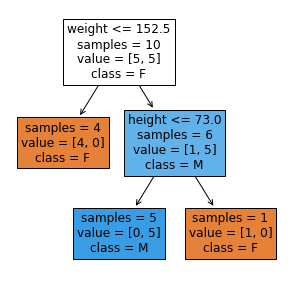

In [37]:
graph = tree.plot_tree(clf, 
                       feature_names=['height', 'weight', 'sex'], 
                       class_names=['F', 'M'],
                       impurity=False,
                       filled=True)

As we can see from the above tree graph, our classifier has chosen weight as the __root node__, from which the tree grows. It has a __sub-tree__ that starts with the height variable, and it has a total of 3 __leaf nodes__. 

The model first looks at weight. If the weight of the individual is less than 152, the model defaults to prediction that the subject is a female. If the weight is greater than 152, the model moves the decision down a branch to the height node. 

Decision trees have their benefits and drawbacks, which are well outlined in the scikit-learn documentation:

>Some __advantages__ of decision trees are:
>- Simple to understand and to interpret. Trees can be visualised.

>- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

>- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

>The __disadvantages__ of decision trees include:

>- Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.

>- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

>- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

For the more comprehensive list of advantages and disadvantage, see here: https://scikit-learn.org/stable/modules/tree.html#decision-trees